## Importing Libraries

In [21]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

In [22]:
customerData = pd.read_csv('dataset\customerData_Clean.csv')

## Showing the data

In [23]:
customerData

,Unnamed: 0,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,MntGroceryProducts,TotalPurchase,YearRange,TotalChild,HaveChild
0,0,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,1,806,25,1950,0,0
1,1,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,9,6,1950,2,1
2,2,1965,Graduation,Married,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,287,21,1960,0,0
3,3,1984,Graduation,Married,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,34,8,1980,1,1
4,4,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,207,19,1980,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2199,2199,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,0,0,0,0,0,267,18,1960,1,1
2200,2200,1946,PhD,Married,64014.0,2,1,10-06-2014,56,406,...,0,1,0,0,0,30,22,1940,3,1
2201,2201,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,0,0,0,0,0,297,19,1980,0,0
2202,2202,1956,Master,Married,69245.0,0,1,24-01-2014,8,428,...,0,0,0,0,0,324,23,1950,1,1


### Importing Machine Learning modules

In [24]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

gbc = GradientBoostingClassifier(n_estimators=500,learning_rate=0.05,random_state=1)

#### Try training Income and Complain using Gradient Boosting Algorithm (Classification)

C:\Users\Muw\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<AxesSubplot:>

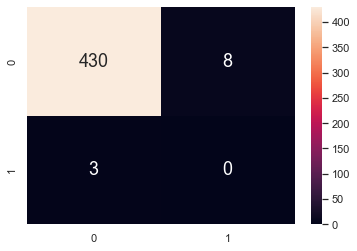

In [25]:
income = pd.DataFrame(customerData['Income'])  # Predictor
complain = pd.DataFrame(customerData['Complain'])      # Response

X_train, X_test, y_train, y_test = train_test_split(income, complain, test_size = 0.20, random_state = 1)

gbc.fit(X_train, y_train)

y_pred = gbc.predict(X_test)

sb.heatmap(confusion_matrix(y_test, y_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

#### Try training Income and TotalPurchase using Gradient Boosting Regression (Regression)

C:\Users\Muw\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


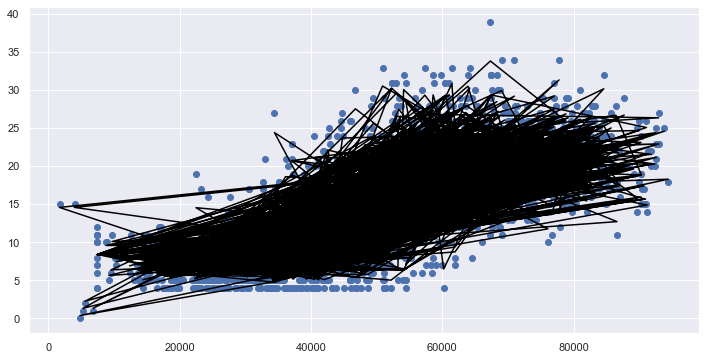

Score for the train model: 0.9453424112672025


<AxesSubplot:>

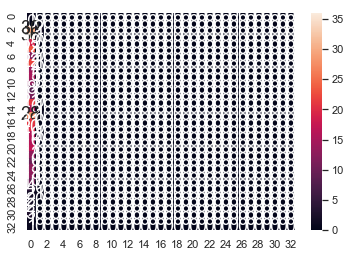

In [26]:
from sklearn.ensemble import GradientBoostingRegressor

income = pd.DataFrame(customerData['Income'])  # Predictor
purchases = pd.DataFrame(customerData['TotalPurchase'])      # Response

X_train, X_test, y_train, y_test = train_test_split(income, purchases, test_size = 0.20, random_state = 1)

gbr = GradientBoostingRegressor(max_depth=12)
gbr.fit(X_train, y_train)

plt.figure(figsize=(12,6))
plt.scatter(X_train, y_train)
plt.plot(X_train.to_numpy(), gbr.predict(X_train), color = 'black')
plt.show()

print("Score for the train model:", gbr.score(X_train, y_train))


y_pred = gbc.predict(X_test)

sb.heatmap(confusion_matrix(y_test, y_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})


In [27]:
import scipy.stats as stats

customerData.loc[customerData['Kidhome'] > 0, 'HasKids'] = True
customerData.loc[customerData['Kidhome'] == 0, 'HasKids'] = False
customerData['HasKids']
print(customerData["HasKids"].value_counts())

stats.ttest_ind(a = customerData['HasKids']==True, b = customerData['HasKids']==False, equal_var=True)

False    1263
True      941
Name: HasKids, dtype: int64


Ttest_indResult(statistic=-9.80283370741693, pvalue=1.8546398271935687e-22)

                 Generalized Linear Model Regression Results                  
Dep. Variable:          TotalPurchase   No. Observations:                 1763
Model:                            GLM   Df Residuals:                     1761
Model Family:                 Poisson   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -5721.0
Date:                Thu, 14 Apr 2022   Deviance:                       3685.8
Time:                        16:26:03   Pearson chi2:                 3.75e+03
No. Iterations:                     4   Pseudo R-squ. (CS):             0.8606
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6959      0.020     86.764      0.0

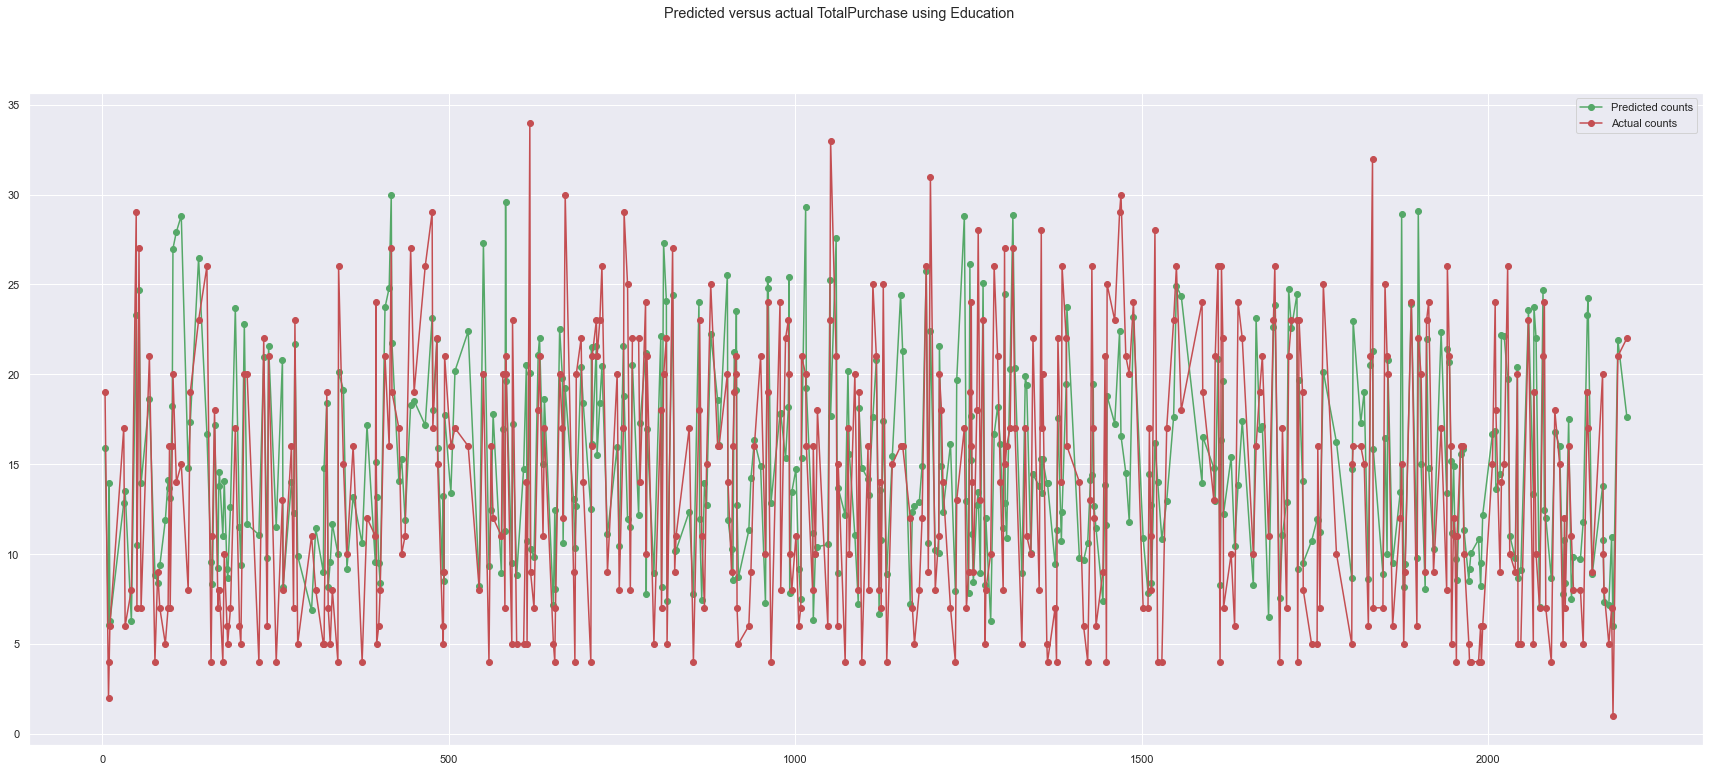

In [68]:
from patsy import dmatrices
import statsmodels.api as sm

mask = np.random.rand(len(customerData)) < 0.8
df_train = customerData.sample(frac = 0.8, random_state=1)
df_test = customerData.drop(df_train.index)

expr = """TotalPurchase ~ Year_Birth + Education + Marital_Status + Kidhome + Teenhome + Income + Recency + YearRange + HaveChild + Complain + Response"""

y_train, X_train = dmatrices(expr, df_train, return_type='dataframe')
y_test, X_test = dmatrices(expr, df_test, return_type='dataframe')

poisson_training_results = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()

print(poisson_training_results.summary())

poisson_predictions = poisson_training_results.get_prediction(X_test)
#summary_frame() returns a pandas DataFrame
predictions_summary_frame = poisson_predictions.summary_frame()
print(predictions_summary_frame)

predicted_counts=predictions_summary_frame['mean']
actual_counts = y_test['TotalPurchase']
fig = plt.figure(figsize = (30, 12))
fig.suptitle('Predicted versus actual TotalPurchase using Education')
predicted, = plt.plot(X_test.index, predicted_counts, 'go-', label='Predicted counts')
actual, = plt.plot(X_test.index, actual_counts, 'ro-', label='Actual counts')
plt.legend(handles=[predicted, actual])
plt.show()

<Figure size 432x288 with 0 Axes>

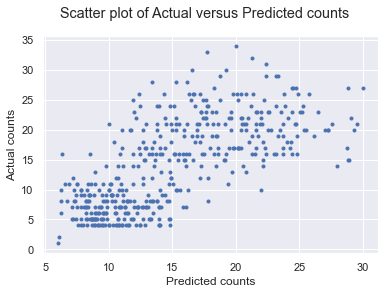

Mean Squared Error (MSE) 	: 29.55245767598084


In [69]:
plt.clf()
fig = plt.figure()
fig.suptitle('Scatter plot of Actual versus Predicted counts')
plt.scatter(x=predicted_counts, y=actual_counts, marker='.')
plt.xlabel('Predicted counts')
plt.ylabel('Actual counts')
plt.show()

from sklearn.metrics import mean_squared_error
print("Mean Squared Error (MSE) \t:", mean_squared_error(actual_counts, predicted_counts))